# Understanding the Challenges of Compter Vision

Computer Vision is a field of Artificial Intelligence and Computer Science that aims at giving computers a visual understanding of the world. The goal of Computer Vision is to emulate human vision using digital images through three main processing components, executed one after the other:
1. Image acquisition
2. Image processing
3. Image analysis and understanding

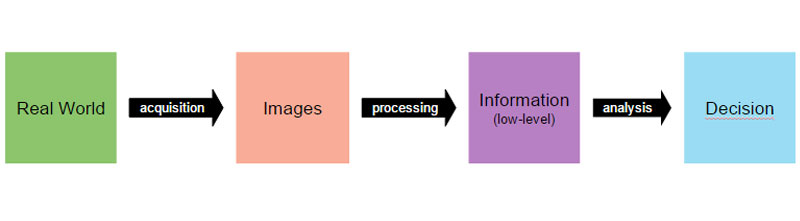
[[src](https://hayo.io/computer-vision/)]

# Preparing the Vision Environment

### Get the notebooks

First, go to my github account and get the notebooks:  
[this notebook](https://github.com/unnamedplay-r/challenges-of-image-classification/blob/master/image_classification.ipynb)  
[image caption notebook](https://github.com/unnamedplay-r/image-captioning/blob/master/image_captioning_model.ipynb)  

### Download the data and build the project structure

Let's download the Caltech101 dataset [here](http://www.vision.caltech.edu/Image_Datasets/Caltech101/#Download). Once you've downloaded it, unzip it into a folder called `data`. You should now have a folder structure like this:
```
+-- image_classification.ipynb
+-- data
|_____+-- 101_ObjectCategories
      |   +-- accordion
      |   +-- airplanes 
      |   +-- etc..
```

### Prepare conda environment

Before we begin, we need to set up our environment to ensure we can run opencv3, a computer vision library. To do this, copy and paste this into into a file called `env-opencv3.yml` file:

```yml
name: opencv3
channels:
  - conda-forge
dependencies:
  - python>=3.6
  - opencv>=3.2.0 # this is the whole reason we're making a new environment
  - pandas>=0.20.3
  - numpy>=1.9.*
  - jupyter>=1.0.0
  - jupyter_client>=5.1.0
  - jupyter_console>=5.1.0
  - jupyter_core>=4.3.0
  - scikit-image>=0.13.0
  - scikit-learn>=0.18.2
  - scipy>=0.19.1
  - seaborn>=0.8
  - matplotlib>=2.0.0
```

then run the command in the shell:
```shell
conda env create -f environment.yml
``` 

once it's done installing the environment, run:
```shell
source activate opencv3
```

# Some History

__Block World__ (1963)  
_Larry Roberts_  
  
This paper was the precursor to modern computer vision was released released trying to find forms within an image. The conjecture was that the edges of an object define it's shape, and wrote processes on how to find edges.

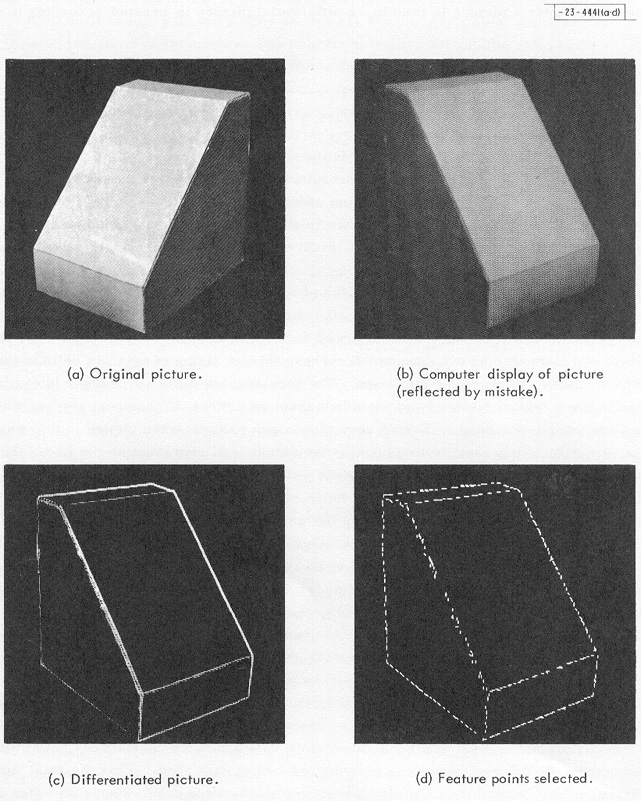
[[src](http://www.packet.cc/images/mach-per-fig2.jpg)]

__Three-Dimensional Object Recognition from Single Two-Dimensional Images__ (1987)  
_David Lowe_  
  
One of the most influential models in the 80s for Computer Vision. This is the first paper trying to recognize images in the real world, and primarily used simple shapes to do so.

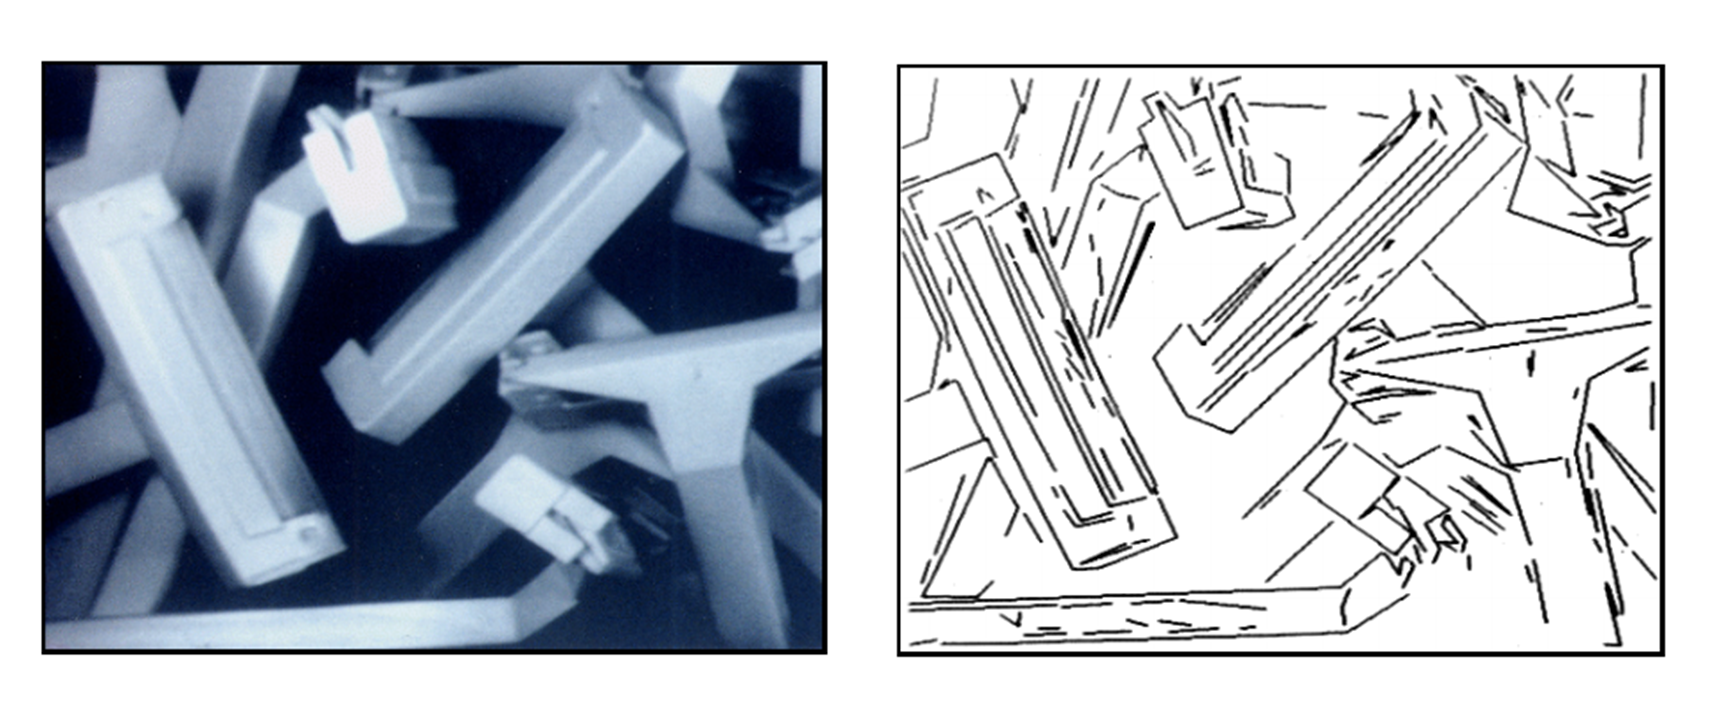  
[[src](http://www.cs.ubc.ca/~lowe/papers/aij87.pdf)]

__Viola Jones Algorithm__  (2001)  
_Paul Viola and Michael Jones_  
  
The first object detection framework to provide competitive object detection rates in real-time proposed by Paul Viola and Michael Jones. Although it can be trained to detect a variety of object classes, it was motivated primarily by the problem of face detection. You can actually see this applied in Snapchat.

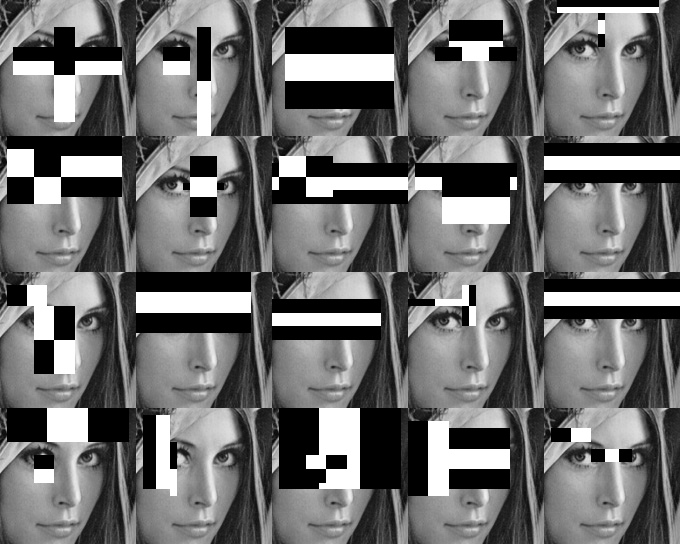 
[[src](https://www.flickr.com/photos/unavoidablegrain/6884354772/in/photostream/)]

# Digital Representation of Images

- Images are lists of pixels, where a pixel determines how 'bright' or intense the light is in a location.
- Pixels range from 0 - 255, with 256 possible values.
- Images can be though of a $\mathbb{Z}^{h \times w \times c}$ matrix, where ___h___ is the height of the image, ___w___ is the width of the image, and ___c___ is the channel for the image. Typically the channel will be in RGB (Red, Green, Blue), but you can have a lot of extensions to this, and include channels beyond the visible light spectrum.
  
Here you can see an example of how images are represented:

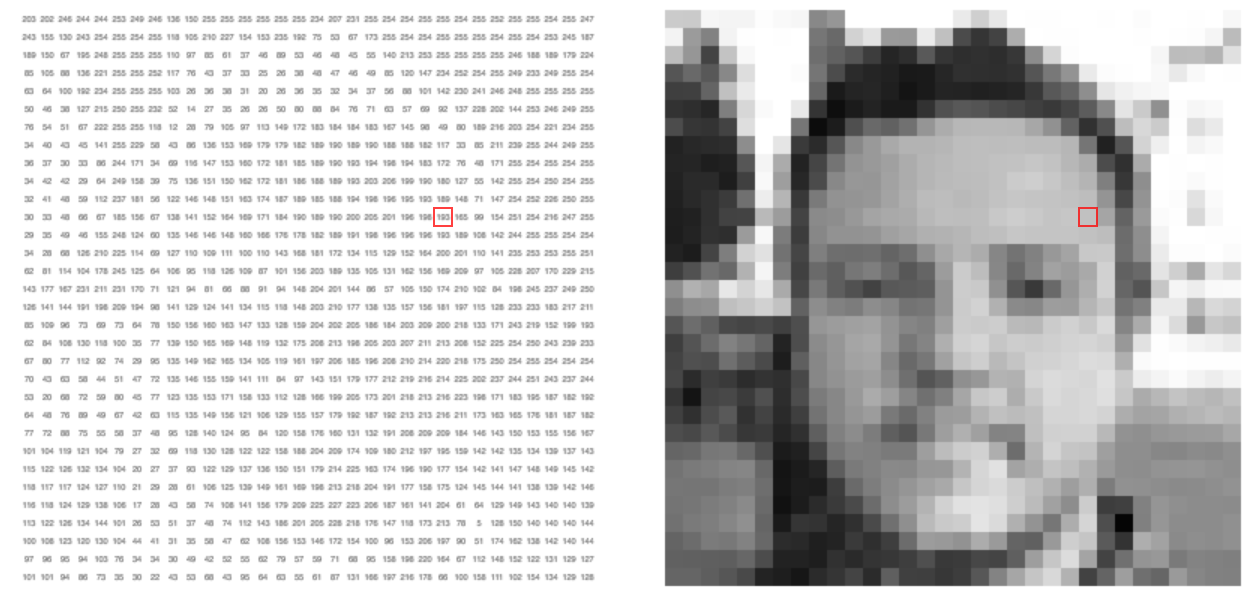

The image above was in gray scale, so how do images in color work? We have a few ways of representing color images, but the most common type, RGB can be thought of as 3 copies of the top image above, but with different values in each channel to represent the intensity of that image with that color.  
  
Here, we can see this visually:  

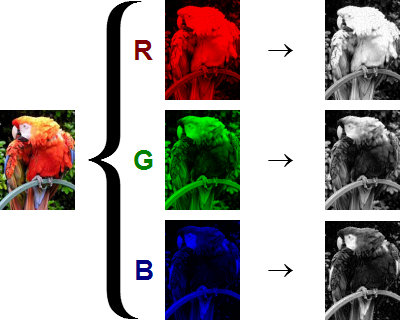

# Image Classification

This is one of the core problems in Computer Vision. Instead of training our models on sets of numerical and categorical data to determine what class an observation belongs to, we instead feed our models the raw values of images, or descriptors of images.

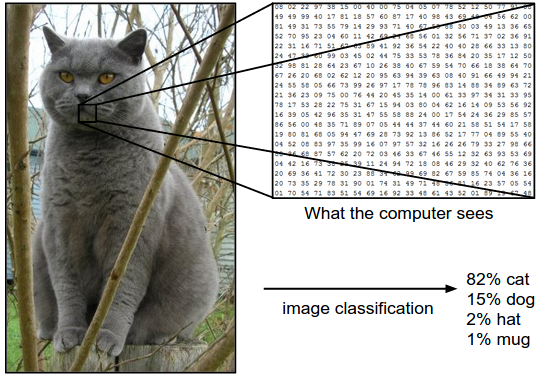
[[src](http://cs231n.github.io/classification/)]

## Problems Faced In Image Classification

Quickly we began trying to solve new challenges, but that doesn't come without a swath of issues:
- **Viewpoint variation** - A single instance of an object can be oriented in many ways with respect to the camera.
- **Scale variation** - Visual classes often exhibit variation in their size (size in the real world, not only in terms of their extent in the image).
- **Deformation** - Many objects of interest are not rigid bodies and can be deformed in extreme ways.
- **Occlusion** - The objects of interest can be occluded. Sometimes only a small portion of an object (as little as few pixels) could be visible.
- **Illumination conditions** - The effects of illumination are drastic on the pixel level.
- **Background clutter** - The objects of interest may blend into their environment, making them hard to identify.
- **Intra-class variation** - The classes of interest can often be relatively broad, such as chair. There are many different types of these objects, each with their own appearance.

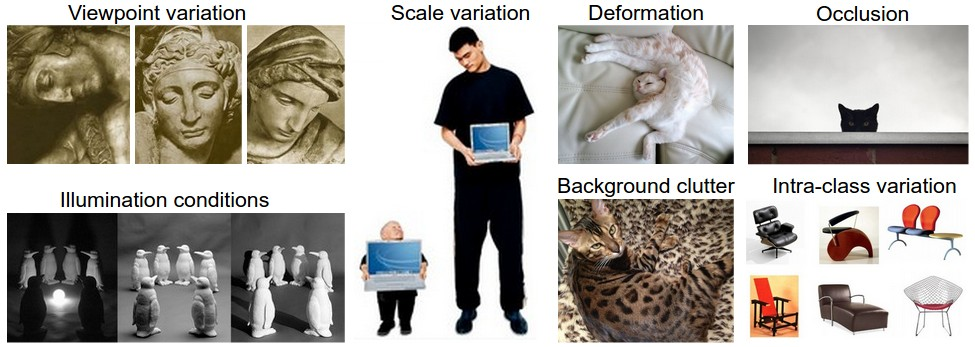
[[src](http://cs231n.github.io/classification/)]

## Before and After 2012

Manual Methods for trying to identify images was a task isolated to a particular domain such as:
- __Object Localization__ - Scan an image for the location of an object of interest
- __Image Segmentation__ - What pixels in an image are the pixels that make up the object?
- __Facial Recognition__ - Is this a human face?
- __Optical Character Recognition__ - Is 0 a zero or an 'o'?
- __Pose Estimation__ - What pose is the object of interest in?
  
Computer Vision researchers would use algorithms to manually encode distinguishing features found within the objects they were lookin for. It helped in insolated tasks, but wasn't ready for generalized use on tons of different tasks on a single system. If the researchers wanted to include a new item to the images they wanted to classify, they would need build another way to encode that object and look for ways to distinguish that item from the rest properly. As you can imagine, this was tough to scale.

Over time, the challenges of computer vision began to grow. There were much larger datasets with far more images and classes to understand. ImageNet was one of the benchmark datasets that was released geared at challenging the Computer Vision community. There were a lot of new ideas expressed during it's initial release to try and create generalized feature extraction structures, making the algorithms more efficient and accurate. This was until 2012 when AlexNet was released into the wild and won that year's score by a huge margin. Ever since then, only other neural network architectures remained at the top of the list.

# Getting a Taste of Image Classificiation Pre-2012

Let's get a sense of what image classification was like prior to 2012. Before we go into classification, let's do a few things here:
1. Load in our images
2. Learn some simple but effective image processing techniques

In [1]:
import os
import pandas as pd

In [2]:
# Location of top level directory
top_path  = './data/101_ObjectCategories'

In [3]:
directories = os.listdir(top_path)[1:]
directories[:10]

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'BACKGROUND_Google',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai']

In [4]:
# Let's load the images into a DataFrame
images = []
for directory in directories:
    pwd = top_path + '/' + directory
    for file in os.listdir(pwd):
        path = pwd + '/' + file
        images.append((path,directory))

columns = ['img_path', 'category']
df = pd.DataFrame(images, columns = columns)

In [5]:
df.head()

img_path   category
0  ./data/101_ObjectCategories/accordion/image_00...  accordion
1  ./data/101_ObjectCategories/accordion/image_00...  accordion
2  ./data/101_ObjectCategories/accordion/image_00...  accordion
3  ./data/101_ObjectCategories/accordion/image_00...  accordion
4  ./data/101_ObjectCategories/accordion/image_00...  accordion

In [6]:
df.category.value_counts()[:10]

airplanes            800
Motorbikes           798
BACKGROUND_Google    468
Faces                435
Faces_easy           435
watch                239
Leopards             200
bonsai               128
car_side             123
ketch                114
Name: category, dtype: int64

In [7]:
# Get top 4 categories except clutter (the first one)
cats = ['airplanes', 'Motorbikes', 'Faces', 'Leopards', 'watch', 'BACKGROUND_Google']
top_cats = df.category.value_counts().loc[cats].index

# these are the amounts of each class. not the greatest balance, but we can work with it.
df.category.value_counts().loc[cats]

airplanes            800
Motorbikes           798
Faces                435
Leopards             200
watch                239
BACKGROUND_Google    468
Name: category, dtype: int64

In [8]:
# this is the number of photos we have in total
df.category.value_counts().loc[cats].sum()

2940

In [9]:
df = df.query('category in @top_cats').copy()

In [10]:
# this should equal the number of values we had as the sum of the value counts
df.shape

(2940, 2)

In [11]:
# memory sanitizing
import gc
del top_path, directories, images, top_cats, cats
gc.collect()

84

# Taking a peek at the pictures

In [12]:
import cv2 # OpenCV3 (i'm not sure why they kept it as 'cv2')
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
def view_img(img, greyscale=False):
    """
    View an image in it's natural aspect ratio.
    """
    # imshow allows us to view images
    if greyscale:
        plt.imshow(img, aspect='auto', cmap='gray')
    else:
        plt.imshow(img, aspect='auto')
    plt.grid(False)
    plt.axis('off')

In [14]:
airplane1_path = df.loc[55].img_path
airplane1_path

'./data/101_ObjectCategories/airplanes/image_0001.jpg'

In [15]:
# this loads an image as an array
airplane1_img = cv2.imread(airplane1_path)
print('Image Dimensions:', airplane1_img.shape)

Image Dimensions: (164, 398, 3)


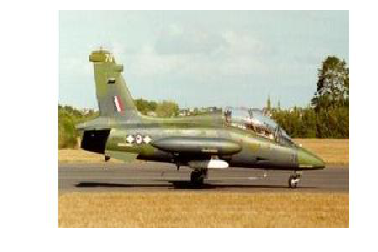

In [16]:
# let's see it!
view_img(airplane1_img[:,:,::-1])

## Question time!

In [18]:
# What does this mean?
airplane1_img[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ..., 
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [19]:
# What does this mean?
airplane1_img[0,0]

array([255, 255, 255], dtype=uint8)

In [20]:
# What does this mean?
airplane1_img[0,0,0]

255

In [21]:
# Sanitize
del airplane1_img
gc.collect()

4918

# Mean of Photos

In [22]:
import numpy as np

In [23]:
def load_img(path, h=32, w=32, greyscale=True):
    """
    This loads in an image as grayscale and reshapes it into a set height and width.
    """
    if greyscale:
        # imread is a function to read in an image, the 0 as the 2nd
        # argument is to denote reading it as gray scale
        img = cv2.imread(path,0)
    else:
        img = cv2.imread(path)
    
    # this ensures we can actually read the image from the given path
    if img is not None:
        return cv2.resize(img, (h,w), interpolation = cv2.INTER_CUBIC)
    else:
        return np.nan

In [24]:
# let's load all the images in a column called 'pixels'
df['pixels'] = df.img_path.apply(lambda x: load_img(x, 100,100, False))

In [25]:
df.pixels.head()

55    [[[255, 255, 255], [255, 255, 255], [255, 255,...
56    [[[255, 255, 255], [255, 255, 255], [255, 255,...
57    [[[255, 255, 255], [255, 255, 255], [255, 255,...
58    [[[255, 255, 255], [255, 255, 255], [255, 255,...
59    [[[255, 255, 255], [255, 255, 255], [255, 255,...
Name: pixels, dtype: object

In [26]:
means = {}
for category, images in df.groupby('category').pixels:
    # when we set axis = 0, we collapse that dimension to compute the mean,
    # so here we're calculating the mean amongst all the images to return
    # a single mean amongst channels for the images.
    means[category] = np.floor(np.mean([img for img in images], axis=0))

In [27]:
np.array([img for img in images]).shape

(239, 100, 100, 3)

In [28]:
# Sanity check to ensure we have the dimenions we specified!
for k,v in means.items():
    print(k,v.shape)

BACKGROUND_Google (100, 100, 3)
Faces (100, 100, 3)
Leopards (100, 100, 3)
Motorbikes (100, 100, 3)
airplanes (100, 100, 3)
watch (100, 100, 3)


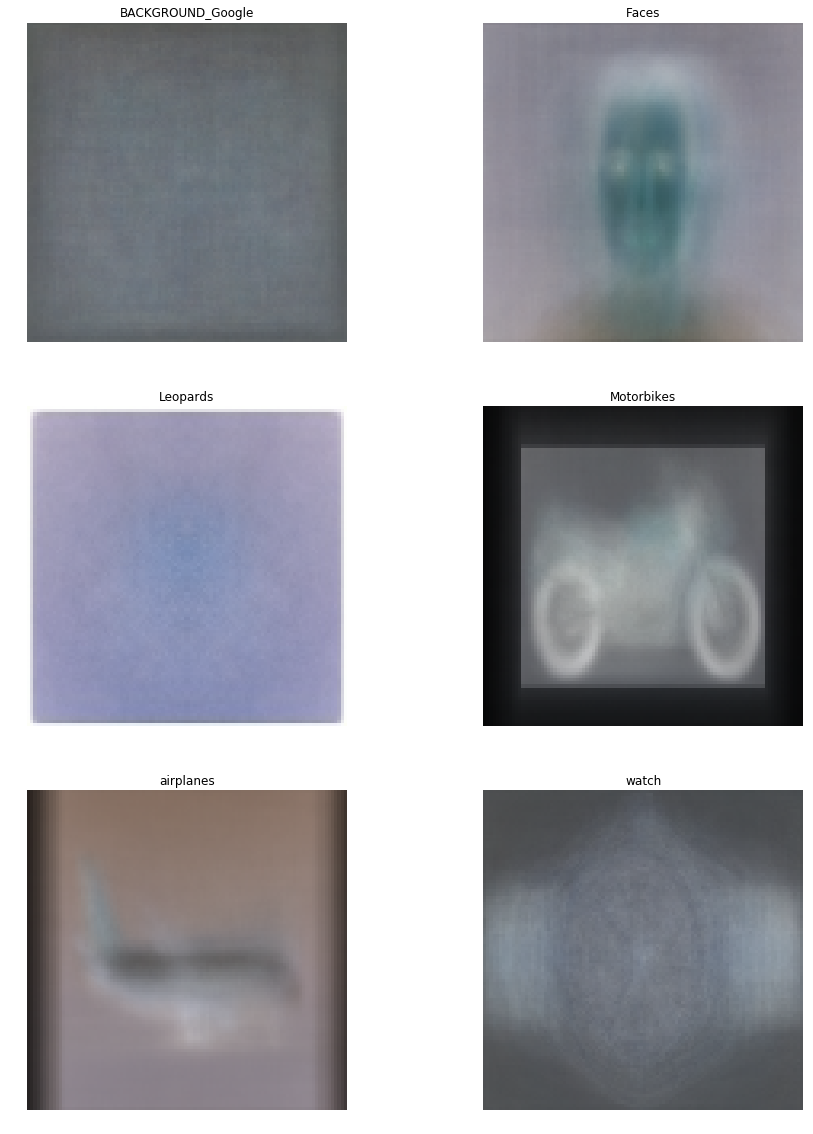

In [29]:
fig, axes = plt.subplots(3,2, figsize=(15,20))
# we flatten the axes so we can iterate through them properly
for (category, img), ax in zip(means.items(), axes.flatten()):
    ax.set_title(category)
    ax.imshow(img[...,::-1])
    ax.grid(False)
    ax.axis('off')

In [30]:
df = df.drop('pixels', axis=1)
del means
gc.collect()

1094

# Modeling on Basic Pixel Features

Let's make this the problem tractable, before we had a feature size of $100 \times 100 \times 3 = 30,000$. Let's reduce the features by reading in the images as black and white and reducing their size to 32 by 32. We'll have a feature size of $32 \times 32 = 1024$.

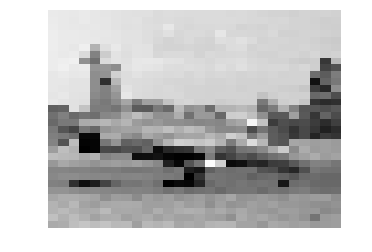

In [31]:
# let's see an example of a greyscale 
airplane1_img = load_img(airplane1_path, h=32,w=32, greyscale=True)
view_img(airplane1_img, greyscale=True)

In [32]:
# what do you expect the shape of this matrix to be?
airplane1_img.shape

(32, 32)

In [33]:
airplane1_img

array([[255, 255, 234, ..., 209, 255, 255],
       [255, 255, 235, ..., 207, 255, 255],
       [255, 255, 236, ..., 206, 255, 255],
       ..., 
       [255, 255, 179, ..., 142, 255, 255],
       [255, 255, 192, ..., 158, 255, 255],
       [255, 255, 170, ..., 158, 255, 255]], dtype=uint8)

In [34]:
# let's make this problem more tractable by reducing the amount of pixels we're using
# this will build a dataframe full of pixels!
df_pxls = df.img_path.apply(lambda x: pd.Series(load_img(x, h=32, w=32, greyscale=True).flatten()))
df_pxls.head()

0     1     2     3     4     5     6     7     8     9     ...   1014  \
55   255   255   234   233   232   234   231   229   228   225  ...    151   
56   255   255   254   252   249   250   246   243   241   239  ...    195   
57   255   255   255   232   239   234   169   208   232   235  ...    158   
58   255   255   255   216   216   212   215   224   220   212  ...    115   
59   255   255   255   253   255   255   254   254   255   255  ...    119   

    1015  1016  1017  1018  1019  1020  1021  1022  1023  
55   169   165   159   164   152   156   158   255   255  
56   193   189   188   182   171   167   172   170   171  
57   158   148   168   138   150   147   255   255   255  
58   122   102   116   128    90   112    87   119   104  
59   128   141   133   122   129   125   131   255   255  

[5 rows x 1024 columns]

In [35]:
df = pd.merge(df, df_pxls, left_index=True, right_index=True)
df.head() # we're back baby!

img_path   category    0    1  \
55  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  255  255   
56  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  255  255   
57  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  255  255   
58  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  255  255   
59  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  255  255   

      2    3    4    5    6    7  ...   1014  1015  1016  1017  1018  1019  \
55  234  233  232  234  231  229  ...    151   169   165   159   164   152   
56  254  252  249  250  246  243  ...    195   193   189   188   182   171   
57  255  232  239  234  169  208  ...    158   158   148   168   138   150   
58  255  216  216  212  215  224  ...    115   122   102   116   128    90   
59  255  253  255  255  254  254  ...    119   128   141   133   122   129   

    1020  1021  1022  1023  
55   156   158   255   255  
56   167   172   170   171  
57   147   255   255   255  
58   112    87   119   104  
59   125   131   255   255  

[5 rows x 1026 columns]

---
### TSNE + PCA - Let's visualize all of these images by mapping them onto a 2D space

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca_result = pca.fit_transform(df.iloc[:,3:])

tsne = TSNE(n_components=2, verbose=1)
tsne_result = tsne.fit_transform(pca_result)

temp = pd.concat([df.category, pd.DataFrame(tsne_result, index=df.index)], axis=1, join='inner')
temp = temp.rename(columns={0:'tnse_1', 1:'tsne_2'})
temp.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2940 samples in 0.006s...
[t-SNE] Computed neighbors for 2940 samples in 0.675s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2940
[t-SNE] Computed conditional probabilities for sample 2000 / 2940
[t-SNE] Computed conditional probabilities for sample 2940 / 2940
[t-SNE] Mean sigma: 375.291616
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.377937
[t-SNE] Error after 1000 iterations: 1.278053


category     tnse_1     tsne_2
55  airplanes -17.472502   7.859304
56  airplanes -32.888618 -24.034721
57  airplanes -28.443417  24.154816
58  airplanes  -3.757812  43.248070
59  airplanes -30.661036  21.402563

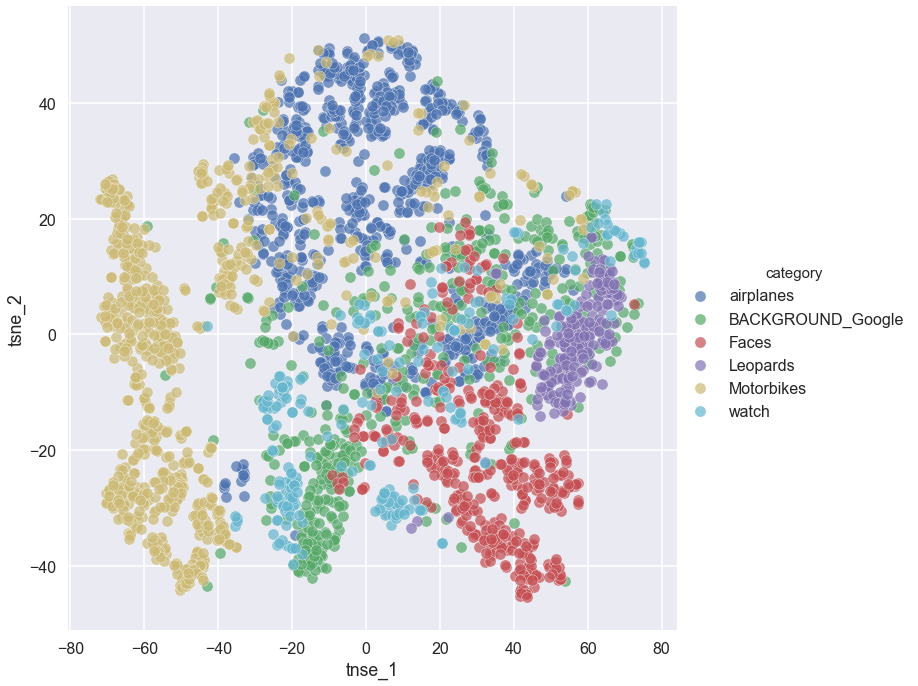

In [36]:
import seaborn as sns
sns.set(context='poster', style='darkgrid')

sns.pairplot(x_vars='tnse_1', y_vars='tsne_2',
             data=temp, hue='category', 
             size=10, plot_kws={'alpha':0.7});

In [37]:
# always wash your hands after playing in dirt
del df_pxls, pca, pca_result, tsne, tsne_result, temp, airplane1_img
gc.collect()

6538

---

In [37]:
# run this if you didn't run TSNE
del df_pxls, airplane1_img
gc.collect()

25740

In [38]:
# let's balance the data set
df.category.value_counts()

airplanes            800
Motorbikes           798
BACKGROUND_Google    468
Faces                435
watch                239
Leopards             200
Name: category, dtype: int64

In [39]:
def Ntrain_test_split(X, y, Ntrain=40, Ntest=10, dtype='float', random_seed=4444, exclude=None):
    """Grabs N training samples for each category in the training data
    
    X - features to split
    y - predictors to split (these must be categorical)
    Ntrain - number of training samples you want from each category
    Ntest - number of test samples you want from each category
    random_seed - random seed applied to the sampling
    exclude - list of categories to be excluded from the TTS
    
    @returns: X_train, y_train, X_test, y_test
    
    """
    # set a seed if needed
    if random_seed:
        np.random.seed(random_seed)
    
    unique = y.unique()
    # print(unique)
    if exclude:
        # remove all labels to exclude
        index = np.argwhere(np.in1d(unique, exclude))
        unique = np.delete(unique, index)
    
    # prepare indexes
    train = np.zeros(len(unique) * Ntrain, dtype)
    test  = np.zeros(len(unique) * Ntest, dtype)
    
    # tracks lower and higher bounds of training and test arrays
    trlb = 0
    trhb = Ntrain
    telb = 0
    tehb = Ntest
    
    for cat in unique:
        # print('\nCategory :', cat)
        # randomly sample N indicies
        train_test = np.random.choice(y[y == cat].index, Ntrain+Ntest, replace=False)
        # print('Sampled set', train_test)
        
        # use the first m indicies for the training sample, and use the rest for the test
        # save them into the training and test index storage
        train[trlb:trhb] = train_test[:Ntrain]
        test[telb:tehb] = train_test[Ntrain:]
        
        # print('Training set :', train)
        # print('Test set :', test)
        
        # increment the bound trackers
        trlb, trhb, telb, tehb = trlb+Ntrain, trhb+Ntrain, telb+Ntest, tehb+Ntest
        
    # print(train)
    X_train = X.loc[train,:]
    y_train = y.loc[train]
    X_test =  X.loc[test,:]
    y_test =  y.loc[test]

    return X_train, y_train, X_test, y_test    

**Function Stub**
```python
def Ntrain_test_split(X, y, Ntrain=40, Ntest=10, dtype='float', random_seed=4444, exclude=None)
```

In [40]:
df.head().iloc[:,2:]

0     1     2     3     4     5     6     7     8     9     ...   1014  \
55   255   255   234   233   232   234   231   229   228   225  ...    151   
56   255   255   254   252   249   250   246   243   241   239  ...    195   
57   255   255   255   232   239   234   169   208   232   235  ...    158   
58   255   255   255   216   216   212   215   224   220   212  ...    115   
59   255   255   255   253   255   255   254   254   255   255  ...    119   

    1015  1016  1017  1018  1019  1020  1021  1022  1023  
55   169   165   159   164   152   156   158   255   255  
56   193   189   188   182   171   167   172   170   171  
57   158   148   168   138   150   147   255   255   255  
58   122   102   116   128    90   112    87   119   104  
59   128   141   133   122   129   125   131   255   255  

[5 rows x 1024 columns]

In [41]:
X_train, y_train, X_test, y_test = Ntrain_test_split(df.iloc[:,2:], 
                                                     df.category, 
                                                     Ntrain=150, 
                                                     Ntest=50)

In [42]:
np.unique(y_train, return_counts=True)
# SWEET! 🙌

(array(['BACKGROUND_Google', 'Faces', 'Leopards', 'Motorbikes', 'airplanes',
        'watch'], dtype=object), array([150, 150, 150, 150, 150, 150]))

**Sanity Check**  
We should see 'False' printed 4 times

In [43]:
# do any values not equal another? <- any true along all the axes? <- any true along those axes?
print((df.loc[X_train.index, :].iloc[:,2:]  != X_train).any().any())
print((df.loc[X_test.index,  :].iloc[:,2:]  != X_test ).any().any())
print((df.loc[y_train.index, :].category    != y_train).any().any())
print((df.loc[y_test.index,  :].category    != y_test ).any().any())

False
False
False
False


## Linear SVM Showtime
Alright, now let's plug this into a LinearSVM. SVMs were incredibly popular classifier for image classification tasks.

In [44]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [45]:
pxl_pipe_lrSVC = LinearSVC(random_state=4444)
%time pxl_pipe_lrSVC.fit(X_train, y_train)
y_pred_pxl = pxl_pipe_lrSVC.predict(X_test)

CPU times: user 5.45 s, sys: 45.9 ms, total: 5.5 s
Wall time: 5.6 s


In [46]:
print('Accuracy: ', pxl_pipe_lrSVC.score(X_test, y_test))

Accuracy:  0.73


### Linear SVM Confusion Matrix

In [47]:
# Compute confusion matrix
pxl_cnf_matrix = confusion_matrix(y_test, y_pred_pxl)
df_pxl_cm = pd.merge(pd.DataFrame(y_train.unique(), columns=['category']),
                     pd.DataFrame(pxl_cnf_matrix), left_index=True, right_index=True).copy()

In [48]:
diverging_cmap = sns.cubehelix_palette(start=2,
                                       rot=0.2,
                                       gamma=1.5,
                                       hue=1, 
                                       light=1, 
                                       dark=0, 
                                       as_cmap = True)

In [49]:
import itertools

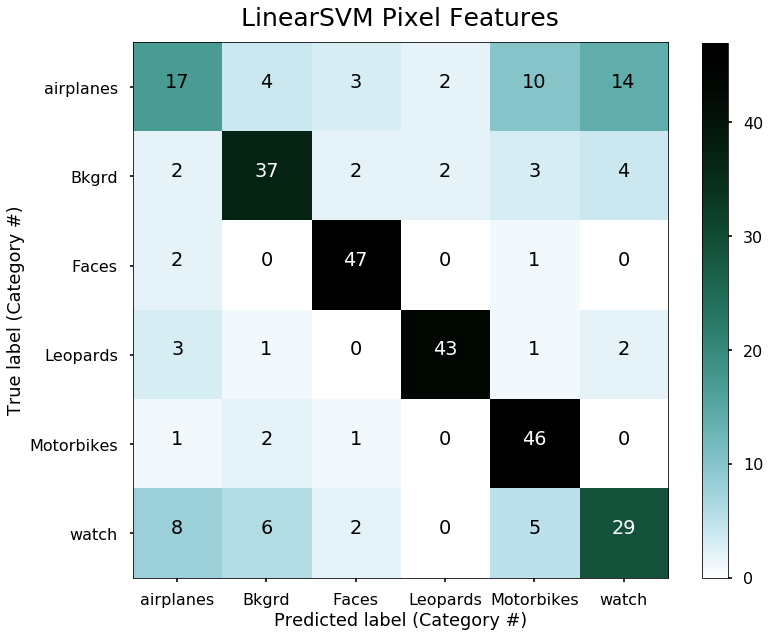

In [50]:
sns.set_context('poster')
plt.figure(figsize=(12,12))
plt.imshow(pxl_cnf_matrix, interpolation='nearest', cmap=diverging_cmap)
plt.grid(False)
plt.colorbar(spacing='proportional', shrink=.82)
df_pxl_cm.loc[1,'category'] = 'Bkgrd'

# Plotting the text over the cells
fmt = 'd'
thresh = pxl_cnf_matrix.max() / 2.
for i, j in itertools.product(range(pxl_cnf_matrix.shape[0]), range(pxl_cnf_matrix.shape[1])):
    plt.text(x=j,
             y=i,
             s=format(pxl_cnf_matrix[i, j], fmt), # s = string
             horizontalalignment="center",
             color="white" if pxl_cnf_matrix[i, j] > thresh else "black")


# Titles & Ticks
plt.title('LinearSVM Pixel Features', fontsize=25, y=1.02)

plt.ylabel('True label (Category #)')
plt.yticks(range(0,6), df_pxl_cm.category)

plt.xlabel('Predicted label (Category #)');
plt.xticks(range(0,6), df_pxl_cm.category);

In [51]:
# reset!
df = df.iloc[:,0:2]
del pxl_pipe_lrSVC, y_pred_pxl, pxl_cnf_matrix, X_train, y_train, X_test, y_test
gc.collect()

12117

In [52]:
df.head()

img_path   category
55  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
56  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
57  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
58  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
59  ./data/101_ObjectCategories/airplanes/image_00...  airplanes

# Modeling on Higher Level Feature Descriptors

>A feature descriptor is a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away extraneous information. ([source](http://www.learnopencv.com/histogram-of-oriented-gradients/))

## Histogram Oriented Gradients (HOG)

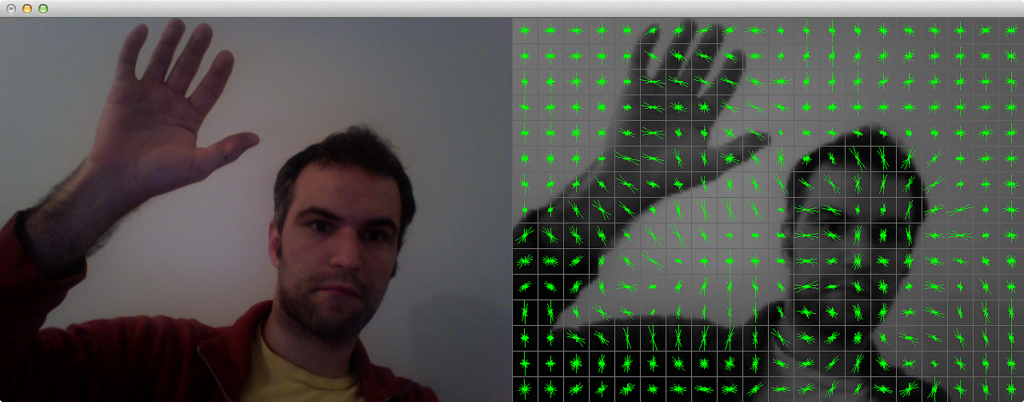

- An amazing article on it - http://www.learnopencv.com/histogram-of-oriented-gradients/
- Skimage docs - http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog
- Example code using skimage - http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [53]:
from skimage.feature import hog
from skimage import exposure

/Users/gabrielruiz/anaconda/envs/opencv3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


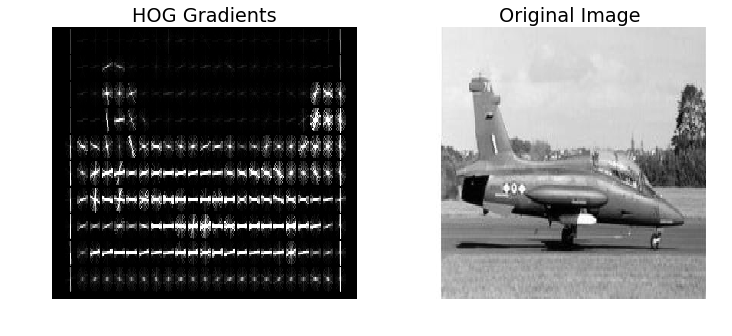

In [54]:
img = cv2.imread(airplane1_path, 0)

fd, hog_img = hog(img, orientations=25, pixels_per_cell=(16, 16),
                  cells_per_block=(1, 1),
                  transform_sqrt=True,  visualise=True)

hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 0.2))


# Plot the pics
fig, ax= plt.subplots(1,2, figsize=(12,5))

ax[0].imshow(hog_image_rescaled, aspect='auto', cmap=plt.cm.gray)
ax[0].axis('off');
ax[0].set_title('HOG Gradients')

ax[1].imshow(img, aspect='auto', cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original Image');

In [55]:
# convert images to 256 x 256
images = df.img_path.apply(lambda x: load_img(x, 256,256, True))

# get the HOG features & store it into a DataFrame
hog_features = [hog(img, orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), transform_sqrt=True)
                    for img in images]

df_hog_features = pd.DataFrame(hog_features, dtype='float32')

# rename each variable to a hog and restore the index
df_hog_features = df_hog_features.rename(columns = lambda x : 'hog_' + str(x+1))
df_hog_features.index = df.index

# merge the tables
df = pd.merge(df, df_hog_features, right_index=True, left_index=True)
df.head()

/Users/gabrielruiz/anaconda/envs/opencv3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


img_path   category     hog_1  \
55  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  0.812134   
56  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  0.851928   
57  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  0.000000   
58  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  0.000000   
59  ./data/101_ObjectCategories/airplanes/image_00...  airplanes  0.000000   

       hog_2     hog_3  hog_4     hog_5     hog_6   hog_7     hog_8    ...     \
55  0.000000  0.000000    0.0  0.180474  0.000000  0.0000  0.000000    ...      
56  0.013479  0.008525    0.0  0.012056  0.021735  0.0341  0.057188    ...      
57  0.000000  0.000000    0.0  0.000000  0.000000  0.0000  0.000000    ...      
58  0.000000  0.000000    0.0  0.000000  0.000000  0.0000  0.000000    ...      
59  0.000000  0.000000    0.0  0.000000  0.000000  0.0000  0.000000    ...      

    hog_2039  hog_2040  hog_2041  hog_2042  hog_2043  hog_2044  hog_2045  \
55  0.178632  0.189973  0.866548  0.006778  0.000000  0.000000  0.001432   
56  0.151174  0.075170  0.313076  0.127015  0.094526  0.042525  0.069659   
57  0.019415  0.103123  0.000000  0.000000  0.000000  0.000000  0.000000   
58  0.152974  0.186667  0.291607  0.132268  0.076287  0.059878  0.059150   
59  0.149515  0.132317  0.650212  0.011384  0.000000  0.000000  0.001530   

    hog_2046  hog_2047  hog_2048  
55  0.000000  0.000000  0.125201  
56  0.064659  0.195154  0.093232  
57  0.000000  0.000000  0.000000  
58  0.092471  0.078317  0.210001  
59  0.000000  0.012038  0.324804  

[5 rows x 2050 columns]

In [56]:
df.shape

(2940, 2050)

In [57]:
del images, hog_features, df_hog_features
gc.collect()

844

## Linear SVM Showtime

In [58]:
X_train, y_train, X_test, y_test = Ntrain_test_split(df.iloc[:,2:], 
                                                     df.category, 
                                                     Ntrain=150, 
                                                     Ntest=50)

In [59]:
hog_pipe_lrSVC = LinearSVC(random_state=4444)
%time hog_pipe_lrSVC.fit(X_train, y_train)
y_pred_hog = hog_pipe_lrSVC.predict(X_test)

CPU times: user 1.16 s, sys: 15.4 ms, total: 1.17 s
Wall time: 1.18 s


In [60]:
print('Accuracy: ', hog_pipe_lrSVC.score(X_test, y_test))

Accuracy:  0.9


In [63]:
# Compute confusion matrix
hog_cnf_matrix = confusion_matrix(y_test, y_pred_hog)
df_hog_cm = pd.merge(pd.DataFrame(y_train.unique(), columns=['category']),
                     pd.DataFrame(hog_cnf_matrix), left_index=True, right_index=True).copy()

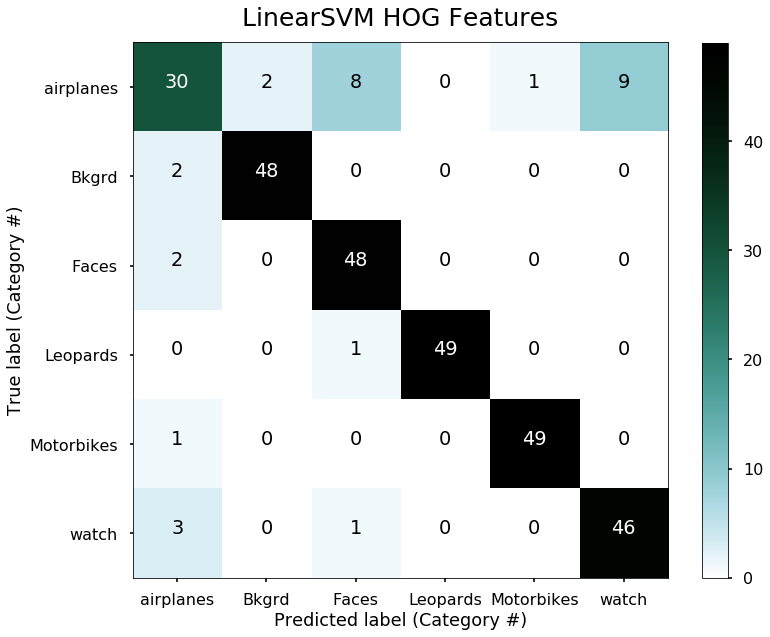

In [64]:
sns.set_context('poster')
plt.figure(figsize=(12,12))
plt.imshow(hog_cnf_matrix, interpolation='nearest', cmap=diverging_cmap)
plt.grid(False)
plt.colorbar(spacing='proportional', shrink=.82)
df_hog_cm.loc[1,'category'] = 'Bkgrd'

# Plotting the text over the cells
fmt = 'd'
thresh = hog_cnf_matrix.max() / 2.
for i, j in itertools.product(range(hog_cnf_matrix.shape[0]), range(hog_cnf_matrix.shape[1])):
    plt.text(x=j,
             y=i,
             s=format(hog_cnf_matrix[i, j], fmt), # s = string
             horizontalalignment="center",
             color="white" if hog_cnf_matrix[i, j] > thresh else "black")


# Titles & Ticks
plt.title('LinearSVM HOG Features', fontsize=25, y=1.02)

plt.ylabel('True label (Category #)')
plt.yticks(range(0,6), df_hog_cm.category)

plt.xlabel('Predicted label (Category #)');
plt.xticks(range(0,6), df_hog_cm.category);

In [65]:
df = df.iloc[:,:2]
del hog_pipe_lrSVC, y_pred_hog, hog_cnf_matrix, X_train, y_train, X_test, y_test
gc.collect()

12334

## Visual Bag of Words using SIFT Features

Learn more about VBW:
- Wiki is pretty awesome on this: https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision
  
Learn more on SIFT descriptors:  
- The wiki: https://en.wikipedia.org/wiki/Scale-invariant_feature_transform
- The original paper: http://www.robots.ox.ac.uk/~vgg/research/affine/det_eval_files/lowe_ijcv2004.pdf

**SIFT Keypoints**
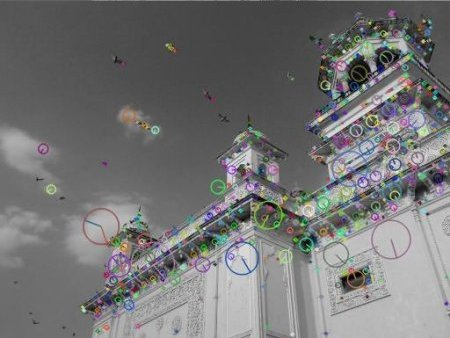

**Bag of Features Pipeline**
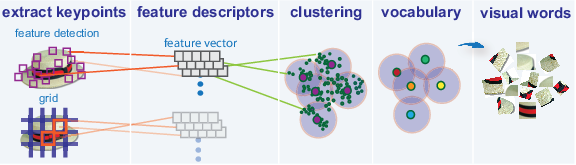

In [66]:
def drawSift(img):
    """
    This returns an image with SIFT descriptors drawn on it
    """
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(img,None)
    sift_img=cv2.drawKeypoints(img,kp,img)
    
    fig, ax = plt.subplots(figsize=(12,12))
    ax.axis('off')
    ax.imshow(sift_img)
    plt.show()

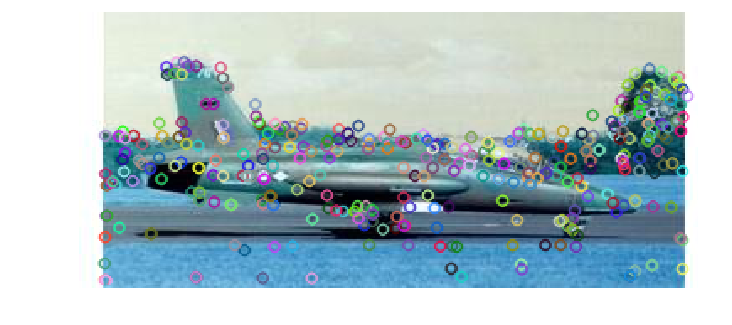

In [67]:
drawSift(img = cv2.imread(airplane1_path))

### Build SIFT Features

In [68]:
columns = ['index', 'label', 'point', 'size', 'angle', 'response', 
           'octave', 'class_id']
dtypes =  {'index': 'int', 
           'label': 'object',
           'point': 'object',
           'size': 'float',
           'angle': 'float',
           'response': 'float',
           'octave': 'float',
           'class_id': 'int'}

for x in range(0,128):
    colname = 'des_' + str(x+1)
    columns.append(colname)
    dtypes[colname] = 'int16'

---
__Run this section below to get descriptors for SIFT__  

Beware, it's super inefficient and I need to rework this.

In [75]:
f = open('sift_features.csv', 'a')

In [76]:
sift = cv2.xfeatures2d.SIFT_create()

In [77]:
def sift_pipeline(path):
    global df_sift_features
    
    df = pd.DataFrame(columns=columns).astype(dtypes)
    data = {'index': path.name,
            'label': path.category}
    
    img_path = path.img_path
    img = cv2.imread(img_path,0)
    
    h=256
    w=256
    img = cv2.resize(img, (h,w), interpolation = cv2.INTER_CUBIC)
    
    if img is not None:
        kps, des = sift.detectAndCompute(img, None)
#         print(kps)
        try:
            for point in zip(des,kps):
                for ind,desc in enumerate(point[0]):
                    data['des_' + str(ind+1)] = np.int16(desc)
                
                data['point'] = [point[1].pt]
                data['size'] = point[1].size
                data['angle'] = point[1].angle
                data['response'] = point[1].response
                data['octave'] = point[1].octave
                data['class_id'] = point[1].class_id

                df = pd.concat([df, pd.DataFrame(data,columns=columns)])
            
            df.to_csv(f, header=False, index=False)
#             df_sift_features = pd.concat([df_sift_features, df])
        except Exception as e:
            print('Failed at index {0}'.format(path.name))
            print(e)
    else:
        return np.nan


In [82]:
df.head().iloc[:,:2]

img_path   category
55  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
56  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
57  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
58  ./data/101_ObjectCategories/airplanes/image_00...  airplanes
59  ./data/101_ObjectCategories/airplanes/image_00...  airplanes

In [84]:
%time df.apply(sift_pipeline, axis=1)
os.system('afplay /System/Library/Sounds/Sosumi.aiff')
os.system('say "Complete"')

Failed at index 969
zip argument #1 must support iteration
CPU times: user 4h 38min 21s, sys: 3min 7s, total: 4h 41min 28s
Wall time: 21h 20min 34s


0

In [ ]:
f.close()
del f

In [95]:
!head sift_features.csv

55,airplanes,"(235.3904266357422, 58.37626647949219)",2.008230447769165,328.9746398925781,0.03233937919139862,8061439.0,-1,69,102,20,0,0,0,1,4,139,123,4,0,0,0,0,1,59,15,3,2,0,0,0,3,0,1,2,3,1,1,1,1,99,5,0,0,1,5,10,54,139,39,7,0,0,0,0,40,84,40,43,6,0,0,0,1,20,14,5,1,0,0,0,15,40,6,8,1,2,2,10,116,128,88,101,2,0,0,0,43,139,102,82,1,0,0,0,14,77,7,1,0,0,0,0,73,10,6,14,7,6,4,5,24,35,21,55,7,1,1,28,70,139,20,9,0,0,0,5,126,70,0,0,0,0,0,0,98
55,airplanes,"(46.53651809692383, 59.856048583984375)",2.114893674850464,127.84783935546875,0.043006785213947296,11796991.0,-1,4,22,18,38,17,8,0,1,21,120,12,2,5,9,8,8,5,26,2,0,11,35,23,20,2,1,1,0,1,2,23,144,0,4,3,3,36,49,0,0,35,144,15,7,31,47,1,2,144,96,2,0,1,6,27,108,24,2,0,0,0,1,42,144,1,0,0,0,12,52,3,1,50,8,0,1,25,98,23,35,144,26,0,0,0,7,10,115,82,21,2,0,0,0,1,30,4,1,0,0,1,26,68,24,4,0,0,0,1,22,106,144,60,0,0,0,0,1,33,144,20,3,1,0,0,0,1,24
55,airplanes,"(44.48934555053711, 62.172760009765625)",2.082423448562622,128.63076782226562,0.033743832260370255,10682

## K-Means to Cluster our Data

In [98]:
from IPython import display

In [214]:
from sklearn.cluster import MiniBatchKMeans
# number of clusters / size of 'image model' / size of histogram
d = 800
kmeans = MiniBatchKMeans(n_clusters=d, random_state=4444)

In [223]:
df_sift_chunks = pd.read_csv('sift_features.csv',
                             header=None,
                             names=columns,
                             iterator=True,
                             chunksize=2000,
                             dtype=dtypes)

In [216]:
# KMeans Clustering
for features in df_sift_chunks:
    print('Current index:', features.index[0])
    print(features.label.values[0])
    
    kmeans.partial_fit(features.iloc[:,8:])
    display.clear_output(wait=True)

Current index: 1356000
watch


## Assigning SIFT Descriptors to a Cluster

In [224]:
ft_columns = ['index', 'label']
ft_dtypes =  {'index': 'int', 
              'label': 'object'}

for x in range(0,d):
    colname = 'des_' + str(x)
    ft_columns.append(colname)
    ft_dtypes[colname] = 'int16'

In [225]:
# we'll use this later to get a full dataframe full of 
df_sift_features = pd.DataFrame(columns=ft_columns)
df_sift_features = df_sift_features.astype(ft_dtypes)

In [226]:
for features in df_sift_chunks:
    print('Current index:', features.index[0])
    print('Current Label:',features.label.values[0],'\n')
    
    # predict the cluster for each of our descriptors and store it
    features['cluster'] = (features
                            .apply(lambda x: pd.Series(kmeans.predict(x.iloc[8:].values.reshape(1,-1))),
                                   axis=1))
    
    # you can see that we're getting the MANY clusters of the SIFT descriptors for each image.
#     print(features.groupby(['label','index'])['cluster'].count())
    # break
    
    # In order to make sense of it and build a single observation
    # we build histograms of those descriptors. Also, sorry for the lack of
    # a better name, this dataframe contains the histogrammed SIFT descriptors
    df_1 = (features
          .groupby(['label','index'])['cluster']
          .apply(lambda x: np.histogram(x, bins=range(0,d+1))[0]) # remember, d is the size of our dictionary
          .reset_index() # I want to get out of the group by syntax
          .rename(columns={'cluster': 'des'}))
#     print('Dataframe:\n\n', df_1)
    
    # expand the histogram (list) into their own separate columns
    des = df_1['des'].apply(pd.Series)
    des = des.rename(columns = lambda x: 'des_' + str(x))
#     print('\nDesc:\n\n', des)
    
    # now merge the dataframe we had with the label and index with the now expanded list
    df_1 = pd.concat([df_1[:], des[:]], axis=1, join='inner')
    df_1 = df_1.drop(['des'], axis=1) # we don't need that list of descripts anymore
#     print('\nDataframe:\n\n', df_1)

    # we simply start building up the df we specified above
    df_sift_features = pd.concat([df_sift_features, df_1])
    display.clear_output(wait=True)

Current index: 1356000
Current Label: watch 



In [227]:
df_sift_features = df_sift_features.reset_index()
df_sift_features = df_sift_features.drop(['level_0'], axis=1)
df_sift_features = (df_sift_features
                     .groupby(['label','index'])
                     .sum()
                     .reset_index())

In [228]:
df_sift_features.to_pickle('df_sift_features.pkl')

In [ ]:
df_sift_features = pd.read_pickle('df_sift_features.pkl')

In [229]:
df_sift_features.head()

label  index  des_0  des_1  des_10  des_100  des_101  des_102  \
0  BACKGROUND_Google    939      0      2      18        0        0        0   
1  BACKGROUND_Google    940      0      1       3        0        0        0   
2  BACKGROUND_Google    941      0      0       0        0        0        0   
3  BACKGROUND_Google    942      0      4       5        0        0        0   
4  BACKGROUND_Google    943      0      1       6        0        0        0   

   des_103  des_104   ...    des_90  des_91  des_92  des_93  des_94  des_95  \
0        1        0   ...         0       1       0       0       0       0   
1        0        0   ...         0       0       0       0       0       0   
2        1        0   ...         0       0       0       0       0       0   
3        2        0   ...         0       0       0       0       0       0   
4        0        0   ...         0       0       0       0       0       0   

   des_96  des_97  des_98  des_99  
0       0       0       3       0  
1       0       0       0       0  
2       0       0       0       0  
3       0       0       0       0  
4       0       0       2       0  

[5 rows x 802 columns]

In [230]:
# we're missing a single observation :(
print('Original df: ', df.shape)
print('Sift df    : ', df_sift_features.shape)

Original df:  (2940, 2)
Sift df    :  (2939, 802)


In [231]:
# get the index back in order
df_sift_features.index = df_sift_features['index'].values
df_sift_features = df_sift_features.drop('index', axis=1)

# Linear SVM Showtime

In [232]:
X_train, y_train, X_test, y_test = Ntrain_test_split(df_sift_features.iloc[:,1:], 
                                                     df_sift_features.label, 
                                                     Ntrain=150, 
                                                     Ntest=50)

In [233]:
# Standardize our data around mean & prep linear SVM
# pxl_pipe_lrSVC = Pipeline([('scaler', StandardScaler()),
#                            ('clf', LinearSVC(random_state=4444))])
vbw_pipe_lrSVC = LinearSVC(random_state=4444)
%time vbw_pipe_lrSVC.fit(X_train, y_train)
y_pred_vbw = vbw_pipe_lrSVC.predict(X_test)

CPU times: user 682 ms, sys: 19.7 ms, total: 702 ms
Wall time: 720 ms


In [234]:
print('Accuracy: ', vbw_pipe_lrSVC.score(X_test, y_test))

Accuracy:  0.616666666667


In [239]:
# Compute confusion matrix
vbw_cnf_matrix = confusion_matrix(y_test, y_pred_vbw)
df_vbw_cm = pd.merge(pd.DataFrame(y_train.unique(), columns=['category']),
                     pd.DataFrame(vbw_cnf_matrix), left_index=True, right_index=True).copy()

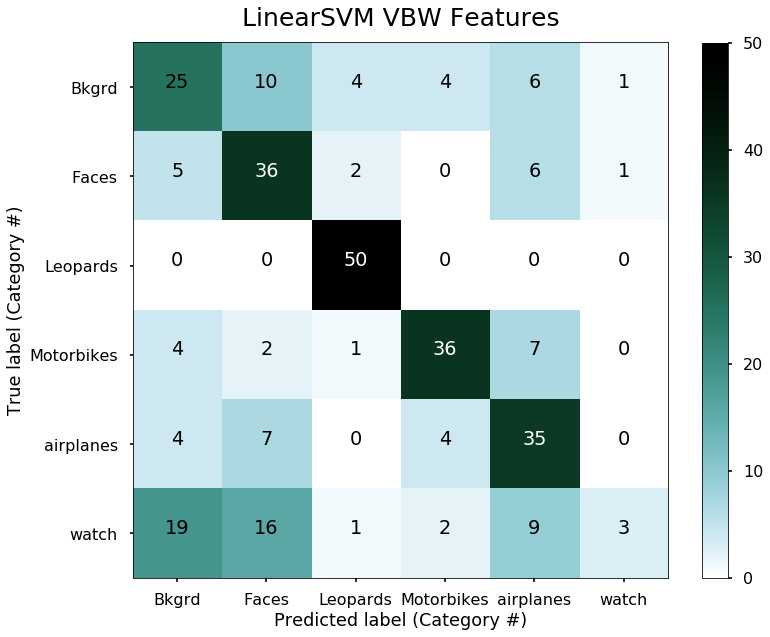

In [240]:
sns.set_context('poster')
plt.figure(figsize=(12,12))
plt.imshow(vbw_cnf_matrix, interpolation='nearest', cmap=diverging_cmap)
plt.grid(False)
plt.colorbar(spacing='proportional', shrink=.82)
df_vbw_cm.loc[0,'category'] = 'Bkgrd'

# Plotting the text over the cells
fmt = 'd'
thresh = vbw_cnf_matrix.max() / 2.
for i, j in itertools.product(range(vbw_cnf_matrix.shape[0]), range(vbw_cnf_matrix.shape[1])):
    plt.text(x=j,
             y=i,
             s=format(vbw_cnf_matrix[i, j], fmt), # s = string
             horizontalalignment="center",
             color="white" if vbw_cnf_matrix[i, j] > thresh else "black")


# Titles & Ticks
plt.title('LinearSVM VBW Features', fontsize=25, y=1.02)

plt.ylabel('True label (Category #)')
plt.yticks(range(0,6), df_vbw_cm.category)

plt.xlabel('Predicted label (Category #)');
plt.xticks(range(0,6), df_vbw_cm.category);

Albeit visual bag of words performed worse than our other features on this small image classification task, this technique is a fundamental, and valuable tool used in Computer Vision to help build descriptors for our images.